In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('heart_attack_prediction_india.csv')
df

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,LDL_Level,HDL_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,9,248,125,93,42,93,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,4,272,51,153,47,134,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,6,268,213,130,54,104,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,9,224,250,130,79,91,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,5,277,129,150,23,141,109,0,0,9,0,0,209,97987,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Maharashtra,20,Female,0,0,0,1,0,1,6,160,238,171,30,133,74,1,1,10,0,0,167,1175023,1,0
9996,9997,Rajasthan,34,Female,0,0,0,0,0,0,5,257,241,193,77,124,78,0,1,1,0,0,123,999441,0,1
9997,9998,Gujarat,76,Male,0,0,0,0,0,0,2,205,69,199,41,151,98,1,0,1,0,1,376,159536,0,0
9998,9999,Andhra Pradesh,52,Male,0,0,0,0,0,1,5,155,288,151,66,127,60,1,0,7,1,0,313,153207,0,0


In [23]:
Data = df.copy()
Data.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,LDL_Level,HDL_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,9,248,125,93,42,93,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,4,272,51,153,47,134,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,6,268,213,130,54,104,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,9,224,250,130,79,91,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,5,277,129,150,23,141,109,0,0,9,0,0,209,97987,0,1


### Dropping unwanted columns

**'Patient_ID','State_Name','LDL_Level','HDL_Level','Healthcare_Access','Annual_Income','Health_Insurance'**

- These are the columns which may not directly influence the biological risk factors for heart attacks.
- There might be few, but we have preserved all other most important columns which directly impacts the risk of Heart Attack

<Axes: xlabel='Heart_Attack_Risk', ylabel='Emergency_Response_Time'>

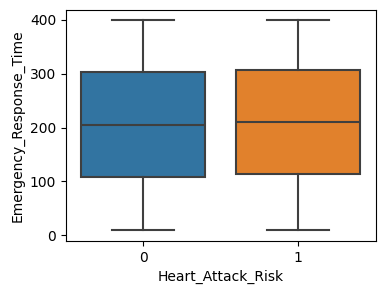

In [25]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Heart_Attack_Risk'], y=df['Emergency_Response_Time'])

- For each of the categories (0,1) of Heart Attack Risk, we are getting same result of Response time.


<Axes: >

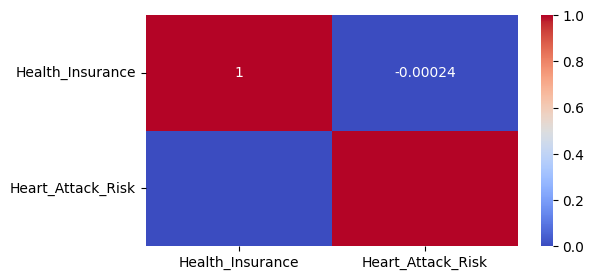

In [31]:
plt.figure(figsize=(6,3))
sns.heatmap(Data[['Health_Insurance', 'Heart_Attack_Risk']].corr(), annot = True, cmap = 'coolwarm')

- The "Health Insurance" and "Heart Attack Risk" columns are almost having no relation b/w them

<Axes: >

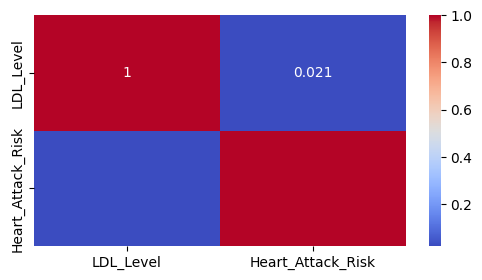

In [33]:
plt.figure(figsize=(6,3))
sns.heatmap(Data[['LDL_Level', 'Heart_Attack_Risk']].corr(), annot = True, cmap = 'coolwarm')

- The "LDL Level" and "Heart Attack Risk" columns are almost having no relation b/w them

In [35]:
Data.drop(['Patient_ID','State_Name','LDL_Level','HDL_Level','Healthcare_Access','Annual_Income',
         'Health_Insurance', 'Emergency_Response_Time'], inplace = True, axis = 1)

- Irrelevant or Weak Predictors: Columns like Patient_ID, State_Name, Annual_Income, Health_Insurance, and Emergency_Response_Time do not directly influence biological risk factors for heart attacks or lack significant correlation with Heart_Attack_Risk in exploratory analysis.

- Redundant or Less Informative Data: LDL_Level, HDL_Level, and Healthcare_Access were removed since other retained features like Cholesterol_Level and Triglyceride_Level provide stronger predictive insights.

- By removing these columns, we are optimizing the dataset for predictive modeling by focusing solely on medically relevant variables.

In [37]:
Data

,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Heart_Attack_History,Heart_Attack_Risk
0,42,Female,0,0,1,1,0,0,9,248,125,93,119,1,0,4,0,0
1,26,Male,0,0,0,0,1,1,4,272,51,134,115,0,0,7,0,0
2,78,Male,0,0,1,0,0,1,6,268,213,104,117,0,1,10,0,0
3,58,Male,1,0,1,0,0,1,9,224,250,91,65,0,0,1,1,0
4,22,Male,0,0,0,0,0,1,5,277,129,141,109,0,0,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20,Female,0,0,0,1,0,1,6,160,238,133,74,1,1,10,0,0
9996,34,Female,0,0,0,0,0,0,5,257,241,124,78,0,1,1,0,1
9997,76,Male,0,0,0,0,0,0,2,205,69,151,98,1,0,1,1,0
9998,52,Male,0,0,0,0,0,1,5,155,288,127,60,1,0,7,0,0


## Exploratory Data Analysis

In [39]:
Data.shape

(10000, 18)

In [41]:
Data.size

180000

In [43]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     10000 non-null  int64 
 1   Gender                  10000 non-null  object
 2   Diabetes                10000 non-null  int64 
 3   Hypertension            10000 non-null  int64 
 4   Obesity                 10000 non-null  int64 
 5   Smoking                 10000 non-null  int64 
 6   Alcohol_Consumption     10000 non-null  int64 
 7   Physical_Activity       10000 non-null  int64 
 8   Diet_Score              10000 non-null  int64 
 9   Cholesterol_Level       10000 non-null  int64 
 10  Triglyceride_Level      10000 non-null  int64 
 11  Systolic_BP             10000 non-null  int64 
 12  Diastolic_BP            10000 non-null  int64 
 13  Air_Pollution_Exposure  10000 non-null  int64 
 14  Family_History          10000 non-null  int64 
 15  Str

In [45]:
Data.isnull().sum()

Age                       0
Gender                    0
Diabetes                  0
Hypertension              0
Obesity                   0
Smoking                   0
Alcohol_Consumption       0
Physical_Activity         0
Diet_Score                0
Cholesterol_Level         0
Triglyceride_Level        0
Systolic_BP               0
Diastolic_BP              0
Air_Pollution_Exposure    0
Family_History            0
Stress_Level              0
Heart_Attack_History      0
Heart_Attack_Risk         0
dtype: int64

In [47]:
Data.duplicated().sum()

0

In [49]:
Data.describe()

,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Heart_Attack_History,Heart_Attack_Risk
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.394900,0.092900,0.24690,0.303700,0.301400,0.352800,0.595800,5.021700,224.753000,174.733300,134.725900,89.312000,0.403600,0.311300,5.518800,0.152500,0.300700
std,17.280301,0.290307,0.43123,0.459878,0.458889,0.477865,0.490761,3.156394,43.359172,71.163447,25.849077,17.396486,0.490644,0.463048,2.866264,0.359523,0.458585
min,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,50.000000,90.000000,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,35.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,187.000000,114.000000,112.000000,74.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,49.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,5.000000,226.000000,174.000000,135.000000,89.000000,0.000000,0.000000,6.000000,0.000000,0.000000
75%,64.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,8.000000,262.000000,236.000000,157.000000,104.000000,1.000000,1.000000,8.000000,0.000000,1.000000
max,79.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10.000000,299.000000,299.000000,179.000000,119.000000,1.000000,1.000000,10.000000,1.000000,1.000000


In [51]:
Data.describe(include='O')

,Gender
count,10000
unique,2
top,Male
freq,5516


In [53]:
# Target Variable Distribution
dist = Data.value_counts('Heart_Attack_Risk')
dist

Heart_Attack_Risk
0    6993
1    3007
Name: count, dtype: int64

In [55]:
# Proportion of distribution of categories in target varable

dist / len(Data) * 100

Heart_Attack_Risk
0    69.93
1    30.07
Name: count, dtype: float64

## Univariate Analysis

In [57]:
# Univariate Continuous Analysis

def uni_var_cont_analysis(Data,col):

    # Non-Visual Analysis of continuous variables
    series = Data[col]
    print('Non-Visual Analysis')
    print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']))
    print('-'*20)

    # Visual Analysis
    fig, axes = plt.subplots(1,3, figsize=(8,3), layout='constrained')
    plt.suptitle('Univariate Analysis')

    axes[0].set_title('Histogram')
    sns.histplot(Data[col], ax=axes[0])

    axes[1].set_title('KDE Plot')
    sns.kdeplot(Data[col], ax=axes[1])

    axes[2].set_title('Box Plot')
    sns.boxplot(Data[col], ax=axes[2])

    fig.show()

# Univariate Categorical Analysis

def uni_var_cat_analysis(Data,col):
    
    # Value Counts
    print('Value counts for column: ')
    print(Data[col].value_counts())
    print()
    print('Proportion of each category in column (%): ')
    print(Data[col].value_counts() / len(Data) * 100)  

    fig,axes = plt.subplots(1,2,figsize=(6,3),layout='constrained')
    plt.suptitle('Categorical Data Distributions')

    axes[0].set_title('Bar Chart')
    sns.countplot(x=col,data=Data,ax = axes[0])
    
    axes[1].set_title('Pie Chart')
    vc_data = Data[col].value_counts()
    axes[1].pie(vc_data, labels = vc_data, autopct = '%1.1f%%')

    fig.show()

### Continuous Univariate Analysis

Non-Visual Analysis
count     10000.000000
min          20.000000
max          79.000000
mean         49.394900
median       49.000000
var         298.608815
std          17.280301
skew          0.025287
kurt         -1.203820
Name: Age, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_15708\3029122183.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


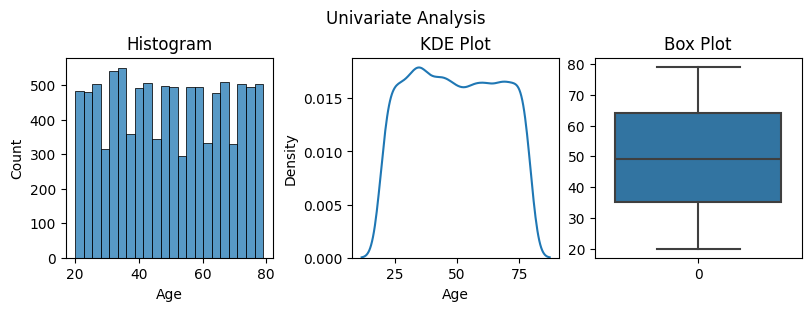

In [44]:
uni_var_cont_analysis(Data,'Age')

**Histogram (Count vs. Age):**

- The histogram shows the distribution of ages, with all individuals falling between 20 and 80 years old. There are noticeable peaks around the 30-40 and 60-70 age ranges.

**Density Plot (Density vs. Age):**

- The density plot provides a smoothed representation of the age distribution, highlighting the concentration of individuals around certain ages. The peak around 30-40 and 60-70 suggests a higher density of individuals in this age range.
- The plot indicates a relatively continuous distribution, with a gradual decrease in density as age increases beyond 70.

**Box Plot (Age):**

- The box plot summarizes the distribution of ages, showing the median (around 48-50), quartiles (around 35 and 65), and range (20 to 80). The box plot suggests a symmetrical distribution of ages.
- The absence of outliers indicates that there are no unusually high or low ages in the dataset.

Non-Visual Analysis
count     10000.000000
min           0.000000
max          10.000000
mean          5.021700
median        5.000000
var           9.962825
std           3.156394
skew         -0.001655
kurt         -1.213173
Name: Diet_Score, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_15708\3029122183.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


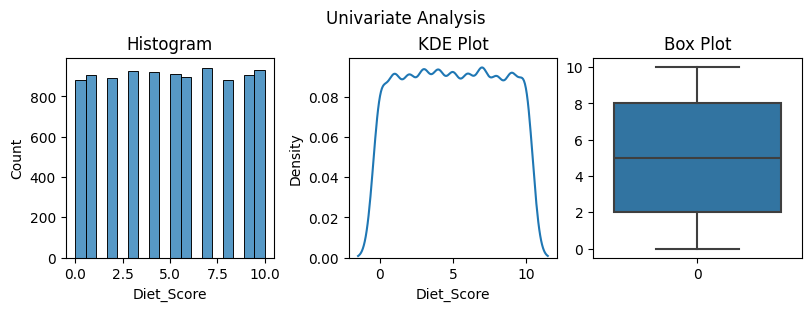

In [46]:
uni_var_cont_analysis(Data,'Diet_Score')

- The distribution of individuals across different Diet_Score values is approximately uniform, indicating no significant skew or imbalance in diet-related habits among the dataset population.

- KDE Plot: The kernel density estimate (KDE) plot for Diet_Score reveals a fairly even distribution across the range of values, indicating no dominant diet patterns among individuals.

- Box Plot: The box plot for Diet_Score shows a well-spread distribution with no significant outliers, confirming a balanced range of dietary habits in the dataset.

Non-Visual Analysis
count     10000.000000
min          90.000000
max         179.000000
mean        134.725900
median      135.000000
var         668.174787
std          25.849077
skew         -0.010408
kurt         -1.197895
Name: Systolic_BP, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_15708\3029122183.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


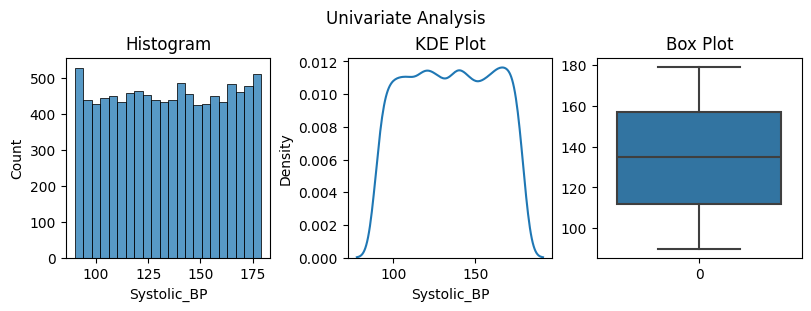

In [48]:
uni_var_cont_analysis(Data,'Systolic_BP')

**Histogram:**

- The histogram shows the distribution of individuals across different systolic BP ranges, with most values clustering between 120-150 mmHg.

- There are slight variations in bar heights, suggesting common BP levels without extreme outliers.

**KDE Plot:**

- The smooth density curve highlights a concentration of values around 135 mmHg, indicating a near-normal distribution.

- Since skewness is close to zero (-0.01), the KDE plot suggests a fairly balanced spread of systolic BP levels.

**Box Plot:**

- The box plot visually captures median (~135 mmHg), quartiles, and range of systolic BP values, confirming most readings fall within a moderate range.

- No significant outliers or extreme values are observed, reinforcing the idea of a balanced distribution.

Non-Visual Analysis
count     10000.000000
min          60.000000
max         119.000000
mean         89.312000
median       89.000000
var         302.637720
std          17.396486
skew          0.011575
kurt         -1.201768
Name: Diastolic_BP, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_15708\3029122183.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


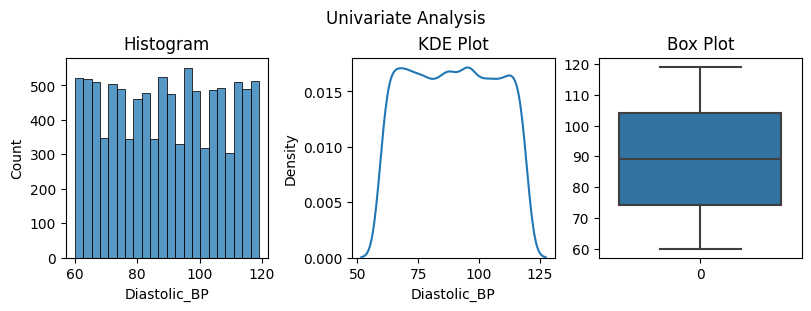

In [50]:
uni_var_cont_analysis(Data,'Diastolic_BP')

**Histogram:**
- The histogram represents the count or frequency distribution of individuals across the ranege of 60 to 120 mmHg Diastolic_BP.
P - There are few taller bins in which the more count of individuals having that particular Diastolic_BP falls into that range and in the same way there are bins which are having dips.

**Kde PLot:**
- The data in this feature is almost normally i=distributed, and having few peaks b/w ranges 60-75, 90-100. Which suggests that most of the datapoints falls under this range.

**Box Plot:**
- The median Diastolic_BP comes out to be approximately 90.
- Most of the values falls under therange of 75 and 105 (Q1 and Q3). 

Non-Visual Analysis
count     10000.000000
min         150.000000
max         299.000000
mean        224.753000
median      226.000000
var        1880.017793
std          43.359172
skew         -0.007401
kurt         -1.204265
Name: Cholesterol_Level, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_15708\3029122183.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


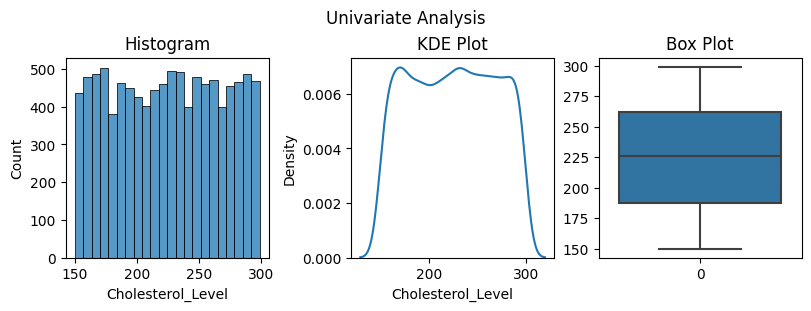

In [53]:
uni_var_cont_analysis(Data,'Cholesterol_Level')

**Histogram:**
- The histogram representing the count of individuals distributed across the Cholesterol_Level range of 150 to 300.
- There are peaks appearing at some range of Cholesterol_Levels (ex: between 150 and 170), which indicating most of the datapoints lying b/w this range.

**Kde PLot:**
- Cholesterol levels are mostly concentrated between 150 to 250 mg/dL, with peaks suggesting common cholesterol ranges among individuals.

**Box Plot:**
- The median cholesterol level is approximately 226 mg/dL, representing the central value where half of the individuals fall below and half above.
- Most cholesterol levels are concentrated between 185 mg/dL (Q1) and 260 mg/dL (Q3), indicating a relatively balanced spread with no extreme outliers.

Non-Visual Analysis
count     10000.000000
min          50.000000
max         299.000000
mean        174.733300
median      174.000000
var        5064.236195
std          71.163447
skew         -0.007505
kurt         -1.173752
Name: Triglyceride_Level, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_15708\3029122183.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


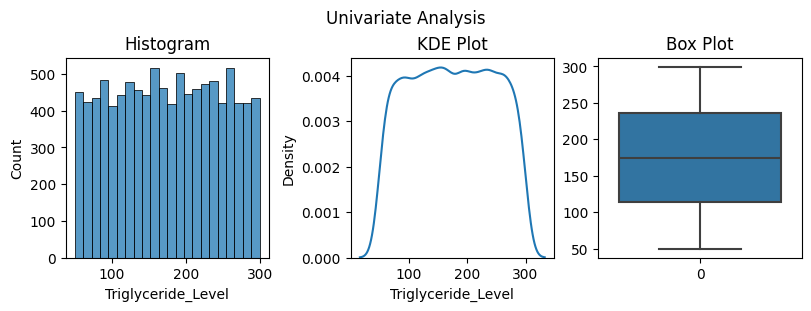

In [55]:
uni_var_cont_analysis(Data,'Triglyceride_Level')

**Histogram:** 
- The histogram shows the frequency distribution of individuals with Triglyceride Levels ranging from 50 to 300 mg/dL, with noticeable peaks indicating common values among individuals.

**KDE Plot:**
- The density curve suggests that Triglyceride Levels are mostly concentrated between 100 to 250 mg/dL, with peaks revealing the most frequent ranges.

**Box Plot:**
- The median Triglyceride Level is approximately 175 mg/dL, with most values lying between 114 mg/dL (Q1) and 236 mg/dL (Q3), indicating a relatively balanced spread.

Non-Visual Analysis
count     10000.000000
min           1.000000
max          10.000000
mean          5.518800
median        6.000000
var           8.215468
std           2.866264
skew          0.008721
kurt         -1.211141
Name: Stress_Level, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_15708\3029122183.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


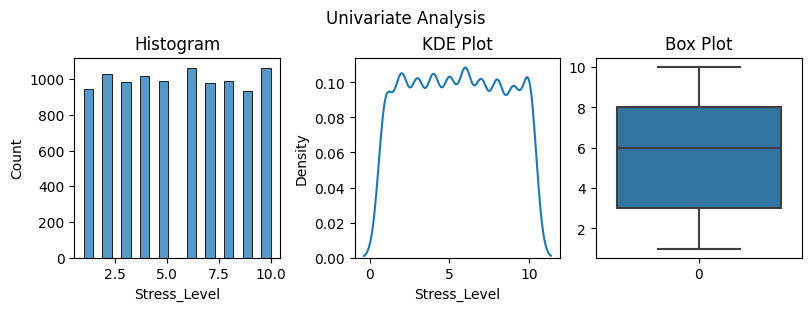

In [57]:
uni_var_cont_analysis(Data,'Stress_Level')

**Histogram:**
- The histogram illustrates the distribution of individuals across different Stress Levels ranging from 1 to 10, highlighting where most individuals fall.

**KDE Plot:**
- The density curve shows that Stress Levels are mostly concentrated between 4 to 7, with noticeable peaks indicating frequent stress ranges.

**Box Plot:**
- The median Stress Level is approximately 6, with most values lying between 3 (Q1) and 8 (Q3), showing a moderate spread without extreme outliers.

### Categorical Univariate Analysis

Value counts for column: 
Gender
Male      5516
Female    4484
Name: count, dtype: int64

Proportion of each category in column (%): 
Gender
Male      55.16
Female    44.84
Name: count, dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_4084\3486114638.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


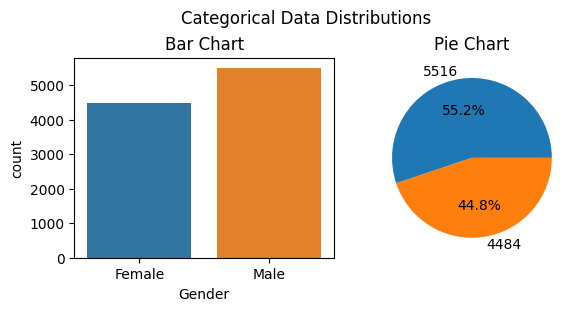

In [116]:
uni_var_cat_analysis(Data,'Gender')

- The bar chart shows the count of each category (Male and Female)
- The pie chart shows the proportion of distribution of each gender.
- We can see that there is no domination b/w the categories, they are almost equally proportionate

Value counts for column: 
Diabetes
0    9071
1     929
Name: count, dtype: int64

Proportion of each category in column (%): 
Diabetes
0    90.71
1     9.29
Name: count, dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_4084\3486114638.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


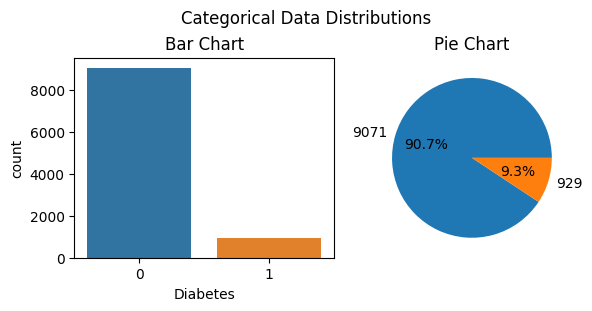

In [118]:
uni_var_cat_analysis(Data,'Diabetes')

- Almost 90% of individuals are not having diabetes.
- One category is dominating the other.
- it is a biased feature/column.

Value counts for column: 
Hypertension
0    7531
1    2469
Name: count, dtype: int64

Proportion of each category in column (%): 
Hypertension
0    75.31
1    24.69
Name: count, dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_4084\3486114638.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


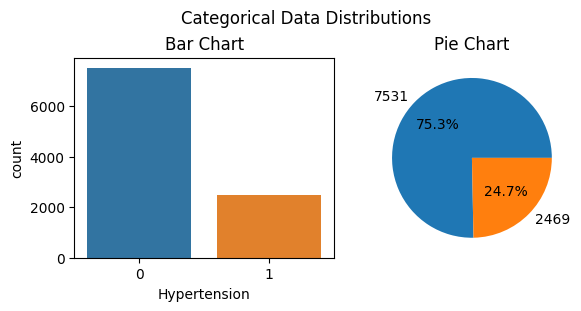

In [120]:
uni_var_cat_analysis(Data,'Hypertension')

- Only 24.7% are suffering from hypertension
- This feature is also biased towards the category having majority of datapoints.

Value counts for column: 
Obesity
0    6963
1    3037
Name: count, dtype: int64

Proportion of each category in column (%): 
Obesity
0    69.63
1    30.37
Name: count, dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_4084\3486114638.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


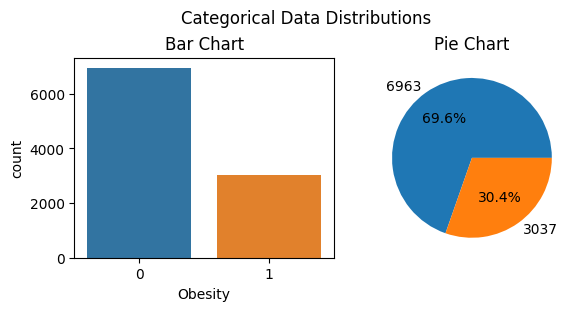

In [122]:
uni_var_cat_analysis(Data,'Obesity')

**Bar Chart:** 
- The bar chart shows the number of individuals in different obesity categories, helping to see how many people are obese and non-obese.

**Pie Chart:** 
- The pie chart shows the percentage of obese and non-obese individuals, making it easy to compare the two groups.

Value counts for column: 
Smoking
0    6986
1    3014
Name: count, dtype: int64

Proportion of each category in column (%): 
Smoking
0    69.86
1    30.14
Name: count, dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_4084\3486114638.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


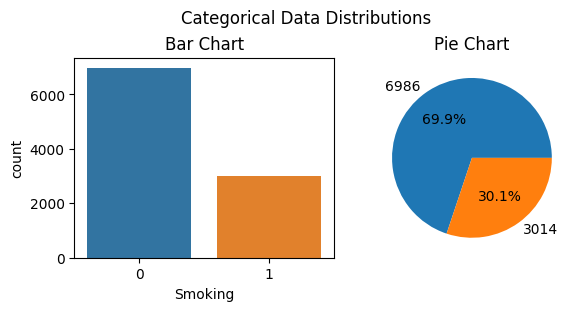

In [124]:
uni_var_cat_analysis(Data,'Smoking')

**Bar Chart:** 
- The bar chart displays the count of individuals in each smoking category, showing how many people smoke and how many don't.

**Pie Chart:**
- The pie chart represents the percentage of smokers and non-smokers, making it easy to compare the proportion of both groups.

Value counts for column: 
Alcohol_Consumption
0    6472
1    3528
Name: count, dtype: int64

Proportion of each category in column (%): 
Alcohol_Consumption
0    64.72
1    35.28
Name: count, dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_4084\3486114638.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


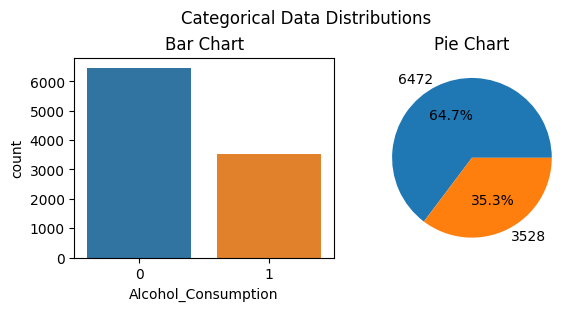

In [126]:
uni_var_cat_analysis(Data,'Alcohol_Consumption')

**Bar Chart:** 
- The bar chart shows the count of individuals in each Alcohol Consumption category.

**Pie Chart:**
- The pie chart represents the percentage distribution of alcohol consumers.

Value counts for column: 
Physical_Activity
1    5958
0    4042
Name: count, dtype: int64

Proportion of each category in column (%): 
Physical_Activity
1    59.58
0    40.42
Name: count, dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_4084\3486114638.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


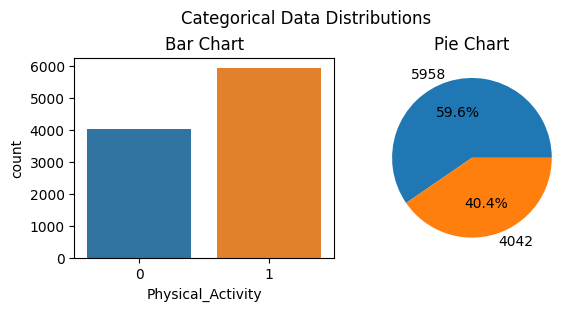

In [128]:
uni_var_cat_analysis(Data,'Physical_Activity')

**Bar Chart:**
- Most individuals engage in physical activity (5,958 people), while 4,042 individuals do not.

**Pie Chart:** 
- 59.58% of individuals are active, and 40.42% are inactive, showing a balanced but slightly skewed distribution.

Value counts for column: 
Air_Pollution_Exposure
0    5964
1    4036
Name: count, dtype: int64

Proportion of each category in column (%): 
Air_Pollution_Exposure
0    59.64
1    40.36
Name: count, dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_4084\3486114638.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


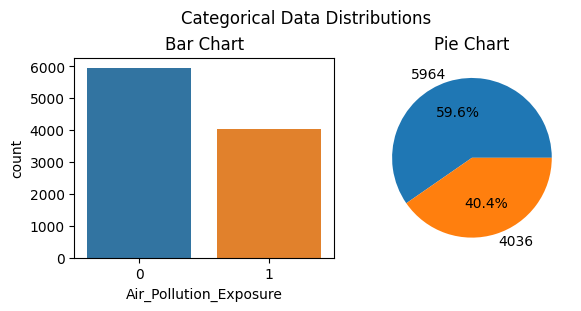

In [130]:
uni_var_cat_analysis(Data,'Air_Pollution_Exposure')

**Bar Chart:**
- Most individuals have low air pollution exposure (5,964 people), while 4,036 individuals experience high exposure.

**Pie Chart:**
- 59.64% of individuals have low exposure, and 40.36% have high exposure, highlighting environmental risk distribution.

Value counts for column: 
Family_History
0    6887
1    3113
Name: count, dtype: int64

Proportion of each category in column (%): 
Family_History
0    68.87
1    31.13
Name: count, dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_4084\3486114638.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


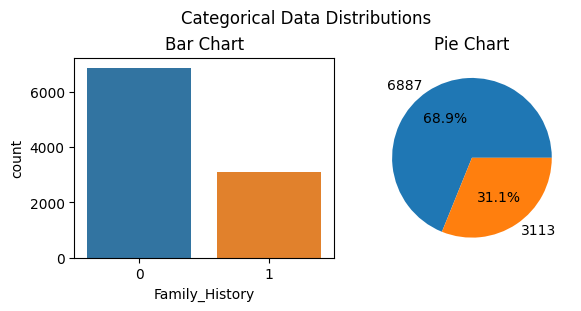

In [132]:
uni_var_cat_analysis(Data,'Family_History')

**Bar Chart:**
- Most individuals (6,887 people) do not have a family history of heart disease, while 3,113 individuals do have one.

**Pie Chart:**
- 68.87% of individuals have no family history, while 31.13% have a family history, showing a genetic risk factor distribution.

Value counts for column: 
Heart_Attack_History
0    8475
1    1525
Name: count, dtype: int64

Proportion of each category in column (%): 
Heart_Attack_History
0    84.75
1    15.25
Name: count, dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_4084\3486114638.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


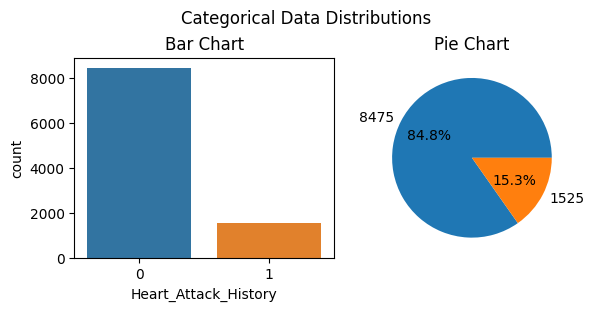

In [134]:
uni_var_cat_analysis(Data,'Heart_Attack_History')

**Bar Chart:** 
- Most individuals (8,475 people) have not had a heart attack, while 1,525 individuals have experienced one.

**Pie Chart:**
- 84.75% of individuals have no history of heart attack, while 15.25% have had at least one. This highlights the proportion of affected individuals in the dataset.

Value counts for column: 
Heart_Attack_Risk
0    6993
1    3007
Name: count, dtype: int64

Proportion of each category in column (%): 
Heart_Attack_Risk
0    69.93
1    30.07
Name: count, dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_4084\3486114638.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


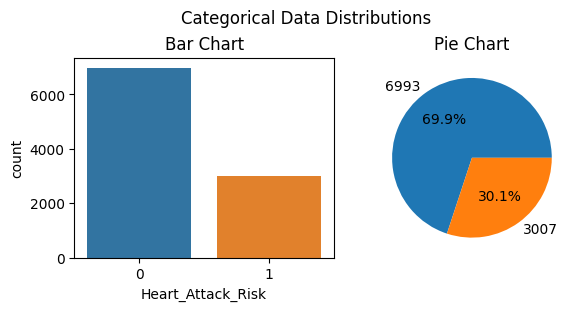

In [136]:
uni_var_cat_analysis(Data,'Heart_Attack_Risk')

**Bar Chart:**
- Most individuals have low heart attack risk (6,993 people), while 3,007 individuals have high risk.

**Pie Chart:**
- 69.93% of individuals are at low risk, while 30.07% are at high risk, showing a significant portion with increased risk factors.

In [59]:
Data.columns

Index(['Age', 'Gender', 'Diabetes', 'Hypertension', 'Obesity', 'Smoking',
       'Alcohol_Consumption', 'Physical_Activity', 'Diet_Score',
       'Cholesterol_Level', 'Triglyceride_Level', 'Systolic_BP',
       'Diastolic_BP', 'Air_Pollution_Exposure', 'Family_History',
       'Stress_Level', 'Heart_Attack_History', 'Heart_Attack_Risk'],
      dtype='object')

In [61]:
Data.head()

,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Heart_Attack_History,Heart_Attack_Risk
0,42,Female,0,0,1,1,0,0,9,248,125,93,119,1,0,4,0,0
1,26,Male,0,0,0,0,1,1,4,272,51,134,115,0,0,7,0,0
2,78,Male,0,0,1,0,0,1,6,268,213,104,117,0,1,10,0,0
3,58,Male,1,0,1,0,0,1,9,224,250,91,65,0,0,1,1,0
4,22,Male,0,0,0,0,0,1,5,277,129,141,109,0,0,9,0,1


## Bivariate Analysis

In [63]:

# cont - cont bivariate
def cont_cont_bivar_analysis(Data, col1, col2):
    print(f'Covaraince: {Data[col1].cov(Data[col2])}')
    print(f'Correlation : {Data[col1].corr(Data[col2])}')

    plt.figure(figsize=(5,3))
    sns.scatterplot(x=col1,y=col2,data=Data)
    plt.show()

# cont - cat bivariate
def cont_cat_bivar_analysis(Data,cat_col,num_col):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=cat_col,y=num_col,data=Data)

### Continuous vs. Continuous Bivariate Analysis

Covaraince: 1.3827641564156419
Correlation : 0.027917764820324452


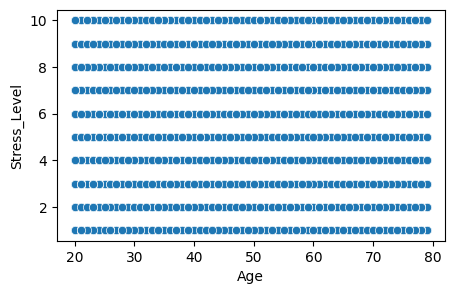

In [79]:
cont_cont_bivar_analysis(Data, 'Age', 'Stress_Level')

- Scatter Plot: The data shows variation in stress levels across different age groups, but there is no clear trend linking age to stress level.

- Correlation: The correlation value is close to zero, suggesting that age does not strongly influence stress levels in the dataset.

Covaraince: 0.577992199219922
Correlation : 0.011591624176880172


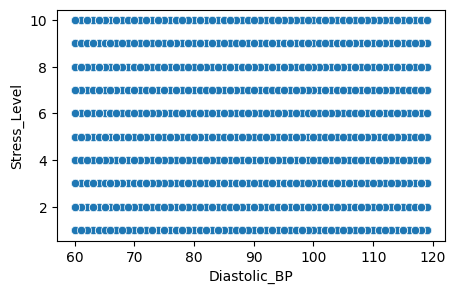

In [82]:
cont_cont_bivar_analysis(Data, 'Diastolic_BP', 'Stress_Level')

- Scatter Plot: The data points show no strong trend between Stress Level and Diastolic BP, indicating a weak or no correlation.

- Correlation: The correlation value is close to zero, suggesting that stress levels do not significantly affect diastolic blood pressure in the dataset.

Covaraince: 0.4148445644564441
Correlation : 0.005599177112121874


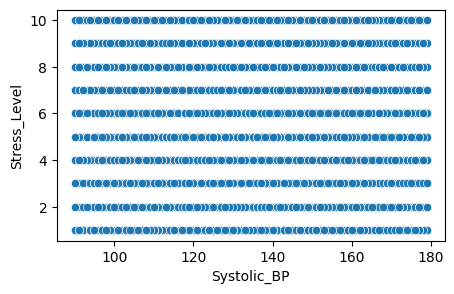

In [85]:
cont_cont_bivar_analysis(Data, 'Systolic_BP', 'Stress_Level')

- Scatter Plot: The data shows no clear trend between Stress Level and Systolic BP, indicating little to no correlation. 
- Correlation: The correlation value is near zero, suggesting that stress levels do not significantly impact systolic blood pressure.

Covaraince: -12.8073404340434
Correlation : -0.01709332940734864


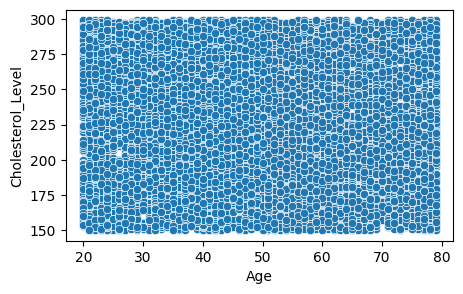

In [162]:
cont_cont_bivar_analysis(Data, 'Age', 'Cholesterol_Level')

- Scatter Plot: The data points show no clear trend between Cholesterol Level and Age, indicating little to no relationship between them.

- Correlation: The correlation value is close to zero, suggesting that age does not significantly impact cholesterol levels in this dataset.

Covaraince: -1.156928302830276
Correlation : -0.005150604580792897


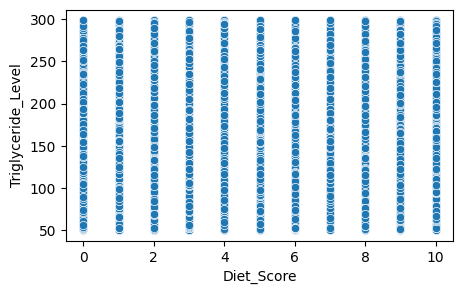

In [164]:
cont_cont_bivar_analysis(Data, 'Diet_Score', 'Triglyceride_Level')

- Scatter Plot: The data shows no clear trend between Diet Score and Triglyceride Level, indicating little to no relationship between them.

- Correlation: The correlation value is close to zero, suggesting that diet quality does not significantly impact triglyceride levels in this dataset.

Covaraince: 1.1896788678867893
Correlation : 0.008692756373400909


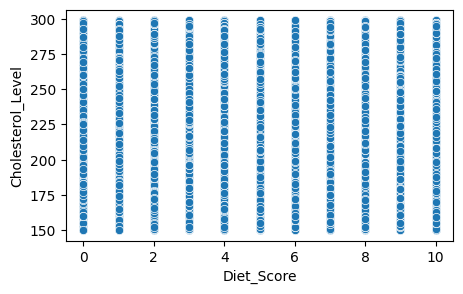

In [166]:
cont_cont_bivar_analysis(Data, 'Diet_Score', 'Cholesterol_Level')

- Scatter Plot: The data shows no strong trend between Diet Score and Cholesterol Level, indicating a weak or no correlation.

- Correlation: The correlation value is close to zero, suggesting that diet quality does not significantly impact cholesterol levels in this dataset.

## Continuous vs. Categorical Bivariate Analysis

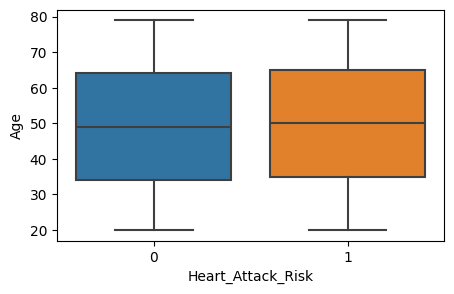

In [186]:
cont_cat_bivar_analysis(Data, 'Heart_Attack_Risk', 'Age')

- Age is evenly spread across individuals with and without heart attack risk. This suggests age alone may not be a strong differentiating factor in heart attack risk within this dataset.

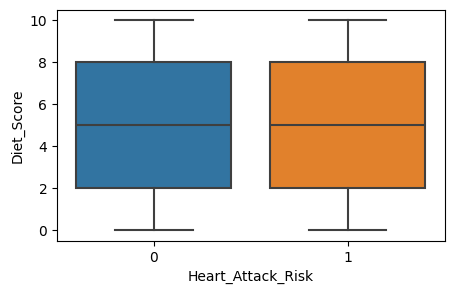

In [172]:
cont_cat_bivar_analysis(Data, 'Heart_Attack_Risk', 'Diet_Score')

- Diet Score is distributed similarly among individuals with and without heart attack risk. This suggests that diet alone may not be a defining factor in determining heart attack risk within the dataset.

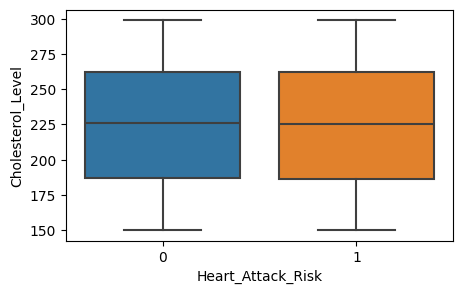

In [174]:
cont_cat_bivar_analysis(Data, 'Heart_Attack_Risk', 'Cholesterol_Level')

- The Cholesterol Level distribution remains fairly consistent across individuals, regardless of their Heart Attack Risk status. This implies that cholesterol alone might not be a decisive predictor of heart attack susceptibility within this dataset.

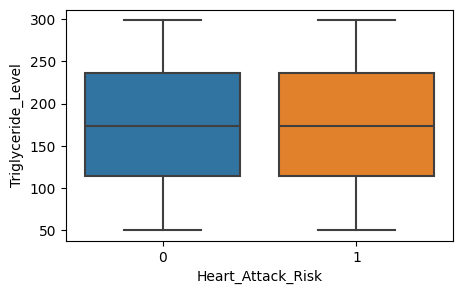

In [176]:
cont_cat_bivar_analysis(Data, 'Heart_Attack_Risk', 'Triglyceride_Level')

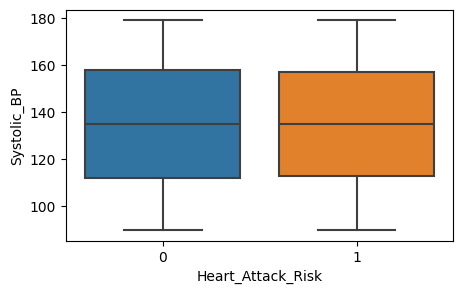

In [178]:
cont_cat_bivar_analysis(Data, 'Heart_Attack_Risk', 'Systolic_BP')

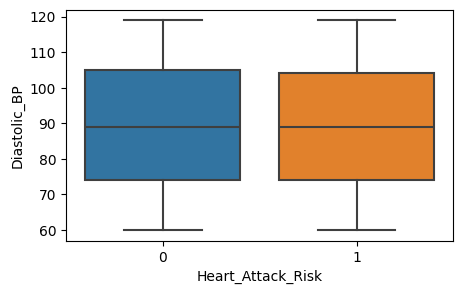

In [180]:
cont_cat_bivar_analysis(Data, 'Heart_Attack_Risk', 'Diastolic_BP')

- The distribution of Diastolic BP, Systolic BP, and Triglyceride Levels remains consistent across individuals, regardless of their Heart Attack Risk status. This suggests that these metrics, on their own, may not serve as primary indicators for assessing heart attack risk within this dataset.- 

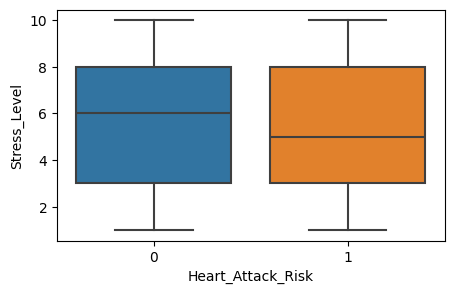

In [182]:
cont_cat_bivar_analysis(Data, 'Heart_Attack_Risk', 'Stress_Level')

- Individuals with heart attack risk have a higher median stress level of 6, compared to 5 for those without risk.

- The overall spread of stress levels is wider for the heart attack risk group, indicating greater variability in stress impact on at-risk individuals.

In [67]:
Data.head()

,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Heart_Attack_History,Heart_Attack_Risk
0,42,Female,0,0,1,1,0,0,9,248,125,93,119,1,0,4,0,0
1,26,Male,0,0,0,0,1,1,4,272,51,134,115,0,0,7,0,0
2,78,Male,0,0,1,0,0,1,6,268,213,104,117,0,1,10,0,0
3,58,Male,1,0,1,0,0,1,9,224,250,91,65,0,0,1,1,0
4,22,Male,0,0,0,0,0,1,5,277,129,141,109,0,0,9,0,1


## Preprocessing

In [69]:
data = Data.copy()
data.head()

,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Heart_Attack_History,Heart_Attack_Risk
0,42,Female,0,0,1,1,0,0,9,248,125,93,119,1,0,4,0,0
1,26,Male,0,0,0,0,1,1,4,272,51,134,115,0,0,7,0,0
2,78,Male,0,0,1,0,0,1,6,268,213,104,117,0,1,10,0,0
3,58,Male,1,0,1,0,0,1,9,224,250,91,65,0,0,1,1,0
4,22,Male,0,0,0,0,0,1,5,277,129,141,109,0,0,9,0,1


In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


In [73]:
data[['Gender']].head()

,Gender
0,0
1,1
2,1
3,1
4,1


In [75]:
data.to_csv('heart_attack_risk_prediction_1.csv',index = False)

In [77]:
x = data.drop(columns=['Heart_Attack_Risk'])
y = data['Heart_Attack_Risk']
x.shape, y.shape

((10000, 17), (10000,))

In [79]:
# Selecting binary columns, then we can split the dataset into two, 
# One of them contains binary values and the other can have continuous numerical columns
# So that we can applyscaling on only these continuous numerical columns

# Select binary columns
binary_columns = [col for col in x.columns if x[col].nunique() == 2]
print("Binary columns:\n", binary_columns)

Binary columns:
 ['Gender', 'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity', 'Air_Pollution_Exposure', 'Family_History', 'Heart_Attack_History']


In [81]:
# Select columns having conotinuous numerical values

numerical_columns = [col for col in data.columns if data[col].nunique() > 2]
print("Numerical columns:\n", numerical_columns)

Numerical columns:
 ['Age', 'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'Systolic_BP', 'Diastolic_BP', 'Stress_Level']


In [83]:
# Applying Train-test split BEFORE scaling

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [85]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 17), (3000, 17), (7000,), (3000,))

### Applying Standard Scaling

In [87]:
# Scaling only numerical columns AFTER the split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled_numerical = scaler.transform(X_test[numerical_columns])

# Reconstructing final X_train and X_test with binary_columns
X_train_scaled = pd.DataFrame(X_train_scaled_numerical, columns=numerical_columns, index=X_train.index)
X_train_scaled[binary_columns] = X_train[binary_columns]

X_test_scaled = pd.DataFrame(X_test_scaled_numerical, columns=numerical_columns, index=X_test.index)
X_test_scaled[binary_columns] = X_test[binary_columns]

In [89]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((7000, 17), (3000, 17), (7000,), (3000,))

In [91]:
X_train_scaled.head()

,Age,Diet_Score,Cholesterol_Level,Triglyceride_Level,Systolic_BP,Diastolic_BP,Stress_Level,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Air_Pollution_Exposure,Family_History,Heart_Attack_History
9069,-0.897074,1.257994,1.119438,0.510868,0.626470,-0.032041,-1.208537,0,1,1,0,0,1,0,0,0,0
2603,-0.201642,1.575555,0.426898,-1.586009,0.781169,-1.590006,0.525731,1,1,0,0,0,0,0,0,0,0
7738,0.493790,-1.600052,0.311475,-1.276403,-0.185700,0.891197,-0.167976,0,0,0,0,0,0,0,1,1,0
1579,-0.665263,0.622873,1.719639,-0.896432,-1.113894,-1.186090,1.566292,0,0,0,0,0,1,1,1,0,0
5058,0.435837,-1.600052,-0.127134,1.341175,0.549121,1.064305,0.525731,1,1,1,0,0,1,1,0,0,0


In [93]:
X_test_scaled.head()

,Age,Diet_Score,Cholesterol_Level,Triglyceride_Level,Systolic_BP,Diastolic_BP,Stress_Level,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Air_Pollution_Exposure,Family_History,Heart_Attack_History
6252,1.363079,1.257994,0.311475,0.384211,-1.461966,-1.705411,-1.555391,1,1,0,0,1,0,0,1,0,0
4684,-0.259595,-0.647370,-0.796589,-1.571936,-0.649797,1.352817,1.566292,0,0,0,0,0,0,0,0,0,0
1731,1.189221,-0.012249,0.842422,-1.107527,0.626470,0.660388,-1.555391,1,0,0,1,0,0,1,1,0,1
4742,-0.491405,0.622873,1.373369,0.989350,-0.340399,0.948900,0.525731,0,0,0,0,0,1,0,1,0,0
4521,-0.665263,1.575555,0.773168,1.650780,-0.649797,0.948900,0.178877,1,0,0,0,0,0,1,0,0,0


In [95]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Heart_Attack_Risk, dtype: int64

## Model Training

### Logistic Regression

In [99]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

# Initialize and train the model
model = LogisticRegression(class_weight='balanced', max_iter=1000)  # Use max_iter=1000 to avoid convergence warnings
model.fit(X_train_scaled, y_train)

# Making predictions on test data
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # For ROC AUC


# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.49333333333333335
Precision: 0.2971729125575279
Recall: 0.5005537098560354
F1 Score: 0.37293729372937295
ROC AUC Score: 0.49270988296839185

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.49      0.57      2097
           1       0.30      0.50      0.37       903

    accuracy                           0.49      3000
   macro avg       0.50      0.50      0.47      3000
weighted avg       0.58      0.49      0.51      3000



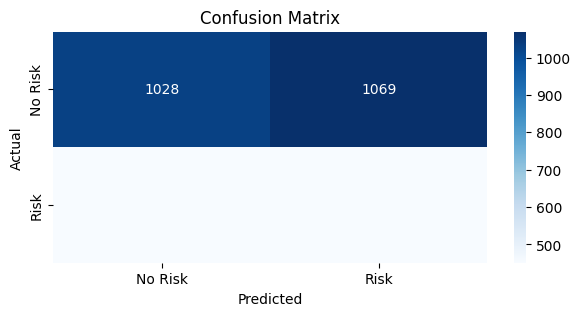

In [87]:

# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk", "Risk"], yticklabels=["No Risk", "Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


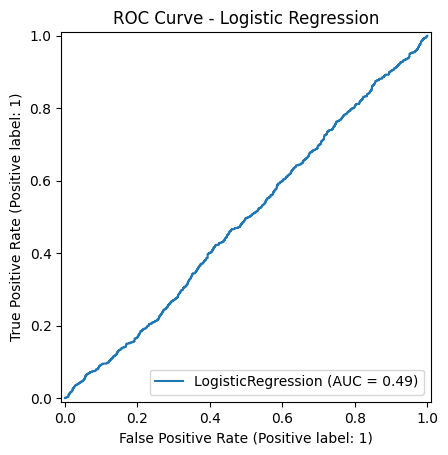

In [89]:
# ROC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [101]:
print(y_train.value_counts(normalize=True))


Heart_Attack_Risk
0    0.699429
1    0.300571
Name: proportion, dtype: float64


### Applying Min Max Scaling

In [103]:
# Scaling only numerical columns AFTER the split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled_numerical = scaler.transform(X_test[numerical_columns])

# Reconstructing final X_train and X_test with binary_columns
X_train_final = pd.DataFrame(X_train_scaled_numerical, columns=numerical_columns, index=X_train.index)
X_train_final[binary_columns] = X_train[binary_columns]

X_test_final = pd.DataFrame(X_test_scaled_numerical, columns=numerical_columns, index=X_test.index)
X_test_final[binary_columns] = X_test[binary_columns]

In [105]:
X_train_final.shape, X_test_final.shape, y_train.shape, y_test.shape

((7000, 17), (3000, 17), (7000,), (3000,))

In [107]:
X_train_scaled.head()

,Age,Diet_Score,Cholesterol_Level,Triglyceride_Level,Systolic_BP,Diastolic_BP,Stress_Level,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Air_Pollution_Exposure,Family_History,Heart_Attack_History
9069,-0.897074,1.257994,1.119438,0.510868,0.626470,-0.032041,-1.208537,0,1,1,0,0,1,0,0,0,0
2603,-0.201642,1.575555,0.426898,-1.586009,0.781169,-1.590006,0.525731,1,1,0,0,0,0,0,0,0,0
7738,0.493790,-1.600052,0.311475,-1.276403,-0.185700,0.891197,-0.167976,0,0,0,0,0,0,0,1,1,0
1579,-0.665263,0.622873,1.719639,-0.896432,-1.113894,-1.186090,1.566292,0,0,0,0,0,1,1,1,0,0
5058,0.435837,-1.600052,-0.127134,1.341175,0.549121,1.064305,0.525731,1,1,1,0,0,1,1,0,0,0


In [109]:
X_test_scaled.head()

,Age,Diet_Score,Cholesterol_Level,Triglyceride_Level,Systolic_BP,Diastolic_BP,Stress_Level,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Air_Pollution_Exposure,Family_History,Heart_Attack_History
6252,1.363079,1.257994,0.311475,0.384211,-1.461966,-1.705411,-1.555391,1,1,0,0,1,0,0,1,0,0
4684,-0.259595,-0.647370,-0.796589,-1.571936,-0.649797,1.352817,1.566292,0,0,0,0,0,0,0,0,0,0
1731,1.189221,-0.012249,0.842422,-1.107527,0.626470,0.660388,-1.555391,1,0,0,1,0,0,1,1,0,1
4742,-0.491405,0.622873,1.373369,0.989350,-0.340399,0.948900,0.525731,0,0,0,0,0,1,0,1,0,0
4521,-0.665263,1.575555,0.773168,1.650780,-0.649797,0.948900,0.178877,1,0,0,0,0,0,1,0,0,0


### Model Training

In [113]:
# Initialize and train the model
model = LogisticRegression(class_weight='balanced', max_iter=1000)  # Use max_iter=1000 to avoid convergence warnings
model.fit(X_train_final, y_train)

# Making predictions on test data
y_pred = model.predict(X_test_final)
y_proba = model.predict_proba(X_test_final)[:, 1]  # For ROC AUC

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.494
Precision: 0.2975641869651086
Recall: 0.5005537098560354
F1 Score: 0.37324525185796864
ROC AUC Score: 0.49276163648855537

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.49      0.58      2097
           1       0.30      0.50      0.37       903

    accuracy                           0.49      3000
   macro avg       0.50      0.50      0.47      3000
weighted avg       0.58      0.49      0.51      3000



#### Class-wise Insights

**Class 0 (Non-risky individuals):**

- Precision: 70% – When the model predicts someone as non-risky, it's correct 70% of the time.

- Recall: 49% – The model only captures 49% of actual safe individuals, meaning it's missing quite a few (false negatives).

- F1-Score: 58% – Shows a moderate balance between precision and recall.

**Class 1 (Risky individuals):**

- Precision: 30% – When predicting risk, only 30% are truly risky, meaning many false positives.

- Recall: 50% – The model identifies half of the actual risky individuals, but misses the other half.

- F1-Score: 37% – Performance in detecting risky individuals is relatively weak.

#### Key Takeaways

- Model has low precision for detecting risky individuals, meaning it misclassifies many safe people as risky.

- It misses 50% of actual risky cases, which is concerning if recall is more important in this scenario.

- The ROC AUC is near 0.5, which indicates it’s not confidently separating classes.

- Precision = 0.30 means: 30% of predicted class 1 samples are truly class 1, while the rest are false positives.
- Recall (0.50) for class 1 means the model correctly identifies 50% of all the 903 actual class 1 samples.
- F1 Score = 0.37 means the model’s overall performance on class 1 is moderate, and there's room for improvement in both precision and recall.
- ROC AUC = 0.49 means, it indicates the model struggles to distinguish between the two classes.
- With AUC = 0.49, the model's performance is almost at random and doesn't capture the true relationship between the classes well.

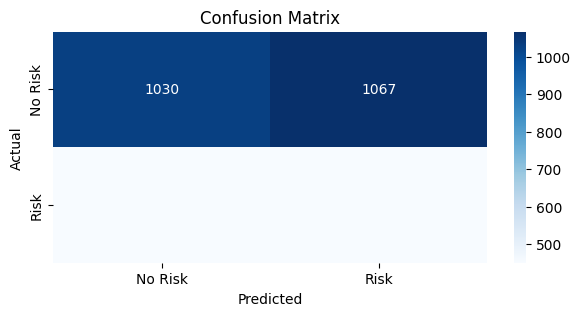

In [103]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk", "Risk"], yticklabels=["No Risk", "Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [107]:
print(len(y_test), len(y_pred))


3000 3000


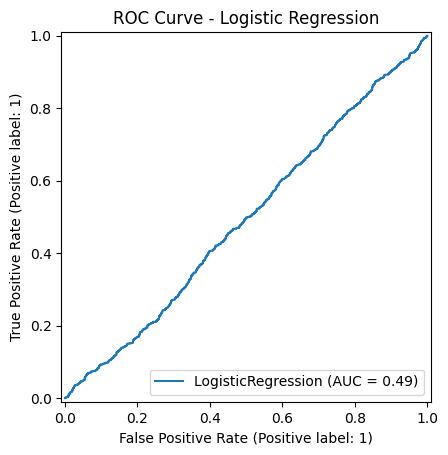

In [105]:
# ROC Curve
RocCurveDisplay.from_estimator(model, X_test_final, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [115]:
# Making predictions on train data

y_pred = model.predict(X_train_final)
y_proba = model.predict_proba(X_train_final)[:, 1]  # For ROC AUC

# Evaluating the model
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision:", precision_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred))
print("F1 Score:", f1_score(y_train, y_pred))
print("ROC AUC Score:", roc_auc_score(y_train, y_proba))
print("\nClassification Report:\n", classification_report(y_train, y_pred))


Accuracy: 0.5198571428571429
Precision: 0.32047986289631536
Recall: 0.5332699619771863
F1 Score: 0.40035682426404995
ROC AUC Score: 0.529525149730361

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.51      0.60      4896
           1       0.32      0.53      0.40      2104

    accuracy                           0.52      7000
   macro avg       0.52      0.52      0.50      7000
weighted avg       0.60      0.52      0.54      7000




**Class 0 (Non-risky cases):**

- Precision: 72% – When the model predicts a case as non-risky, it’s correct 72% of the time.

- Recall: 51% – The model correctly identifies 51% of actual non-risky cases.

- F1-Score: 60% – The harmonic mean of precision and recall shows a moderate balance.

**Class 1 (Risky cases):**

- Precision: 32% – When the model flags a case as risky, only 32% are actually risky (low confidence).

- Recall: 53% – The model captures 53% of actual risky cases, but misses 47% (false negatives).

- F1-Score: 40% – Indicates weaker performance in identifying risky individuals.

- 


ROC AUC - 0.53 --> Slightly better than random. Indicates the model struggles to distinguish between the two classes.

**Logistic Regression is underperforming in our case.**

- Logistic Regression assumes linear separability — that the two classes (risk vs. no-risk) can be separated with a straight line (or hyperplane in higher dimensions). But in our data:

    - During EDA, we have observed that continuous features like Blood Pressure, Stress Level, Triglyceride Level, Age, etc., had very similar distributions across both risk and non-risk groups.
    
    - That means: no clear boundary exists for the model to learn — so Logistic Regression is mostly guessing and defaulting to the majority class (class 0).

- Let's try and test the model one more time by applying custom thresholding

In [117]:
# trained on min max scaled data

# Making predictions on test data
y_pred = model.predict(X_test_final)
y_proba = model.predict_proba(X_test_final)[:, 1]  # For ROC AUC

# y_proba_model = model.predict_proba(X_test)[:, 1]  # get probabilities
y_pred_custom_model = (y_proba >= 0.3).astype(int)  # apply threshold


# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred_custom_model))
print("Precision:", precision_score(y_test, y_pred_custom_model))
print("Recall:", recall_score(y_test, y_pred_custom_model))
print("F1 Score:", f1_score(y_test, y_pred_custom_model))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom_model))


Accuracy: 0.301
Precision: 0.301
Recall: 1.0
F1 Score: 0.46272098385857036
ROC AUC Score: 0.49276163648855537

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2097
           1       0.30      1.00      0.46       903

    accuracy                           0.30      3000
   macro avg       0.15      0.50      0.23      3000
weighted avg       0.09      0.30      0.14      3000



C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- By lowering the threshold from 0.5 to 0.3, we're telling the model:
  
    - "If the probability that a sample belongs to class 1 is at least 30%, call it class 1."

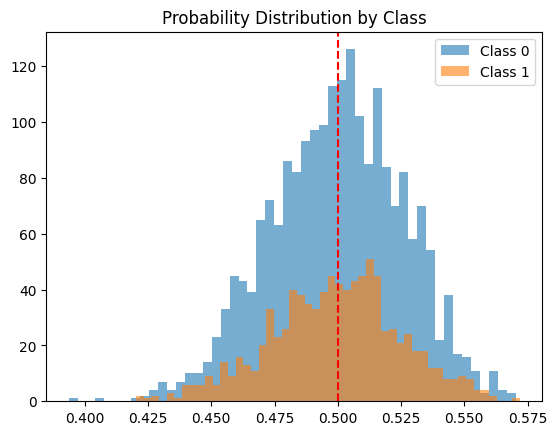

In [157]:
import matplotlib.pyplot as plt
plt.hist(y_proba[y_test == 0], bins=50, alpha=0.6, label='Class 0')
plt.hist(y_proba[y_test == 1], bins=50, alpha=0.6, label='Class 1')
plt.axvline(0.50, color='red', linestyle='--')
plt.legend()
plt.title('Probability Distribution by Class')
plt.show()


- **The bars show how many samples fall at each probability level**

    - Blue bars = actual class 0 (no risk) samples
    
    - Orange bars = actual class 1 (at risk) samples
    
    - So taller bars mean more samples had that probability.

- **Overlap around 0.5 = the model is confused**

    - The blue and orange bars are overlapping heavily between 0.47 and 0.53.
    
    - That means the model gives similar probability scores to both risky and non-risky patients.
    
    - It’s not clearly separating them — this is why its default predictions (threshold 0.5) aren't good for class 1.

In [120]:
X_train_final.shape, X_test_final.shape, y_train.shape, y_test.shape

((7000, 17), (3000, 17), (7000,), (3000,))

### SMOTE

In [122]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Before SMOTE: Heart_Attack_Risk
0    4896
1    2104
Name: count, dtype: int64
After SMOTE: Heart_Attack_Risk
1    4896
0    4896
Name: count, dtype: int64


In [124]:
# Initialize and train the model
model = LogisticRegression(class_weight='balanced', max_iter=1000)  # Use max_iter=1000 to avoid convergence warnings
model.fit(X_train_resampled, y_train_resampled)

# Making predictions on test data
y_pred = model.predict(X_test_final)
y_proba = model.predict_proba(X_test_final)[:, 1]  # For ROC AUC

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4826666666666667
Precision: 0.29449018366054464
Recall: 0.5149501661129569
F1 Score: 0.37469782433521354
ROC AUC Score: 0.49192777109734886

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56      2097
           1       0.29      0.51      0.37       903

    accuracy                           0.48      3000
   macro avg       0.49      0.49      0.47      3000
weighted avg       0.57      0.48      0.50      3000



In [126]:
# Making predictions on train data
y_pred = model.predict(X_train_final)
y_proba_train = model.predict_proba(X_train_final)[:, 1]  # For ROC AUC

# Evaluating the model
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision:", precision_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred))
print("F1 Score:", f1_score(y_train, y_pred))
print("ROC AUC Score:", roc_auc_score(y_train, y_proba_train))
print("\nClassification Report:\n", classification_report(y_train, y_pred))


Accuracy: 0.5034285714285714
Precision: 0.3093385214007782
Recall: 0.5289923954372624
F1 Score: 0.39038933707471063
ROC AUC Score: 0.5215205358917965

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.49      0.58      4896
           1       0.31      0.53      0.39      2104

    accuracy                           0.50      7000
   macro avg       0.51      0.51      0.49      7000
weighted avg       0.59      0.50      0.52      7000



In [133]:
binary_columns = [col for col in x.columns if x[col].nunique() == 2]
print("Binary columns:\n", binary_columns)

Binary columns:
 ['Gender', 'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity', 'Air_Pollution_Exposure', 'Family_History', 'Heart_Attack_History']


                     Gender  Diabetes  Hypertension   Obesity   Smoking  \
Heart_Attack_Risk                                                         
0                  0.548978  0.094666      0.247247  0.304304  0.305162   
1                  0.557699  0.088793      0.246092  0.302295  0.292650   

                   Alcohol_Consumption  Physical_Activity  \
Heart_Attack_Risk                                           
0                             0.358215           0.593880   
1                             0.340206           0.600266   

                   Air_Pollution_Exposure  Family_History  \
Heart_Attack_Risk                                           
0                                0.405691        0.310882   
1                                0.398736        0.312271   

                   Heart_Attack_History  
Heart_Attack_Risk                        
0                              0.152581  
1                              0.152311  


<Figure size 1200x600 with 0 Axes>

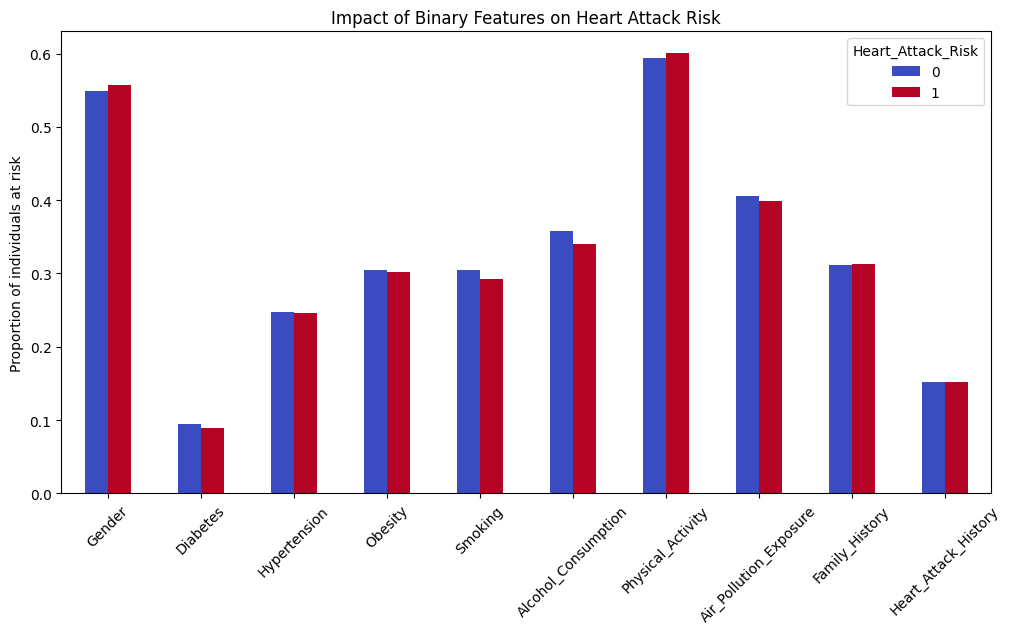

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the proportion of heart attack risk per category
binary_relation = data.groupby("Heart_Attack_Risk")[binary_columns].mean()

# Print the relation
print(binary_relation)

# Visualizing binary feature impact
plt.figure(figsize=(12, 6))
binary_relation.T.plot(kind="bar", figsize=(12,6), colormap="coolwarm")
plt.title("Impact of Binary Features on Heart Attack Risk")
plt.ylabel("Proportion of individuals at risk")
plt.xticks(rotation=45)
plt.show()


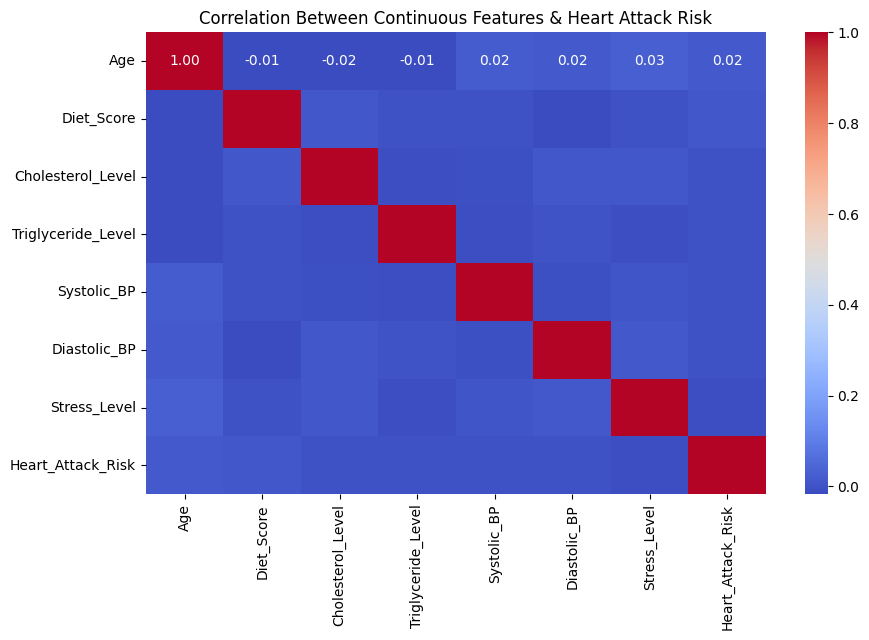

In [139]:
# Compute correlation with target variable
continuous_cols = ['Age', 'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'Systolic_BP', 'Diastolic_BP', 'Stress_Level']
correlation_matrix = data[continuous_cols + ["Heart_Attack_Risk"]].corr()

# Heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Continuous Features & Heart Attack Risk")
plt.show()


- Since correlation is close to zero, these features aren't linearly dependent on heart attack risk.

- They might still interact in non-linear ways—which is why models like tree-based algorithms (Random Forest, XGBoost) often work better in capturing complex patterns.

- Some variables may have a weak but important effect when considered alongside other features (i.e., feature combinations rather than individual influence).